In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [244]:
df = pd.read_csv(r'C:\Users\RICHITHA REDDY\Desktop\new_ml.csv')

In [245]:
df.columns

Index(['RollNo.', 'Branch', 'Gender', 'tenth', 'inter', 'exam_type', 'Sem1',
       'Backlogs1', 'Sem2', 'Backlogs2', 'Sem3', 'Backlogs3', 'Sem4',
       'Backlogs4'],
      dtype='object')

# Exploratory Data Analysis (EDA):
# Academic Performance Analysis
# Branch-wise Analysis
# Gender-based Analysis
# Predictive Modeling
# Identify Key Factors Influencing Performance

In [246]:
df = df.set_index('RollNo.')
#for unique identification

In [247]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender')


In [248]:
# Convert 'tenth' column to numeric (assuming it contains numeric values)
df['tenth'] = pd.to_numeric(df['tenth'], errors='coerce')

# Count the number of students with 10th marks greater than 10
count_greater_than_10 = df[df['tenth'] > 10].shape[0]

print(f'Total number of students with 10th marks greater than 10: {count_greater_than_10}')


Total number of students with 10th marks greater than 10: 206


In [249]:
# Convert 'TENTH %' column to numeric (assuming it contains numeric values)
df['tenth'] = pd.to_numeric(df['tenth'], errors='coerce')

# Filter and keep only rows where 'TENTH %' is not greater than 10
df = df[df['tenth'] <= 10]

# Display the updated DataFrame
print(df)


           Branch  tenth inter exam_type  Sem1 Backlogs1  Sem2  Backlogs2  \
RollNo.                                                                     
21B81A0101  CIVIL    9.5   922       CON  8.03         0  7.89        0.0   
21B81A0102  CIVIL    8.8   758      Mgt.     8         0  7.84        0.0   
21B81A0103  CIVIL    8.5   612       CON     0         4  0.00        1.0   
21B81A0104  CIVIL    9.8   970      Mgt.     0         2  7.70        0.0   
21B81A0105  CIVIL   10.0   960       CON  7.78         0  8.76        0.0   
...           ...    ...   ...       ...   ...       ...   ...        ...   
21B81A67C4     DS   10.0   974       CON  7.88         0  8.75        0.0   
21B81A67C5     DS   10.0   986      MGT.  9.48         0  9.60        0.0   
21B81A67C6     DS   10.0   956       CON  7.58         0  9.43        0.0   
21B81A67C7     DS   10.0   984       CON  9.33         0  9.50        0.0   
21B81A67C8     DS    9.8   963       CON   8.7         0  9.28        0.0   

In [250]:
# Replace '#REF' with NaN in 'INTER MARKS' column
df.loc[:, 'inter'].replace('#REF', np.nan, inplace=True)

# Convert 'INTER MARKS' column to numeric
df.loc[:, 'inter'] = pd.to_numeric(df['inter'], errors='coerce')

# Filter and keep only rows where 'INTER MARKS' is not NaN
df = df[df['inter'].notnull()]

# Display the updated DataFrame
print(df)


           Branch  tenth  inter exam_type  Sem1 Backlogs1  Sem2  Backlogs2  \
RollNo.                                                                      
21B81A0101  CIVIL    9.5  922.0       CON  8.03         0  7.89        0.0   
21B81A0102  CIVIL    8.8  758.0      Mgt.     8         0  7.84        0.0   
21B81A0103  CIVIL    8.5  612.0       CON     0         4  0.00        1.0   
21B81A0104  CIVIL    9.8  970.0      Mgt.     0         2  7.70        0.0   
21B81A0105  CIVIL   10.0  960.0       CON  7.78         0  8.76        0.0   
...           ...    ...    ...       ...   ...       ...   ...        ...   
21B81A67C4     DS   10.0  974.0       CON  7.88         0  8.75        0.0   
21B81A67C5     DS   10.0  986.0      MGT.  9.48         0  9.60        0.0   
21B81A67C6     DS   10.0  956.0       CON  7.58         0  9.43        0.0   
21B81A67C7     DS   10.0  984.0       CON  9.33         0  9.50        0.0   
21B81A67C8     DS    9.8  963.0       CON   8.7         0  9.28 

In [251]:
# Scale 'INTER MARKS' to a scale of 10
df['inter'] = (df['inter'] / df['inter'].max()) * 10

# Display the updated DataFrame
print(df)


           Branch  tenth     inter exam_type  Sem1 Backlogs1  Sem2  Backlogs2  \
RollNo.                                                                         
21B81A0101  CIVIL    9.5  9.294355       CON  8.03         0  7.89        0.0   
21B81A0102  CIVIL    8.8  7.641129      Mgt.     8         0  7.84        0.0   
21B81A0103  CIVIL    8.5  6.169355       CON     0         4  0.00        1.0   
21B81A0104  CIVIL    9.8  9.778226      Mgt.     0         2  7.70        0.0   
21B81A0105  CIVIL   10.0  9.677419       CON  7.78         0  8.76        0.0   
...           ...    ...       ...       ...   ...       ...   ...        ...   
21B81A67C4     DS   10.0  9.818548       CON  7.88         0  8.75        0.0   
21B81A67C5     DS   10.0  9.939516      MGT.  9.48         0  9.60        0.0   
21B81A67C6     DS   10.0  9.637097       CON  7.58         0  9.43        0.0   
21B81A67C7     DS   10.0  9.919355       CON  9.33         0  9.50        0.0   
21B81A67C8     DS    9.8  9.

In [252]:
# Convert 'TENTH %' and 'INTER MARKS' columns to numeric
df['tenth'] = pd.to_numeric(df['tenth'], errors='coerce')
df['inter'] = pd.to_numeric(df['inter'], errors='coerce')

# Calculate the average of 'TENTH %' and 'INTER MARKS'
df['Schooling Average'] = df[['tenth', 'inter']].mean(axis=1)

# Display the updated DataFrame
print(df)


           Branch  tenth     inter exam_type  Sem1 Backlogs1  Sem2  Backlogs2  \
RollNo.                                                                         
21B81A0101  CIVIL    9.5  9.294355       CON  8.03         0  7.89        0.0   
21B81A0102  CIVIL    8.8  7.641129      Mgt.     8         0  7.84        0.0   
21B81A0103  CIVIL    8.5  6.169355       CON     0         4  0.00        1.0   
21B81A0104  CIVIL    9.8  9.778226      Mgt.     0         2  7.70        0.0   
21B81A0105  CIVIL   10.0  9.677419       CON  7.78         0  8.76        0.0   
...           ...    ...       ...       ...   ...       ...   ...        ...   
21B81A67C4     DS   10.0  9.818548       CON  7.88         0  8.75        0.0   
21B81A67C5     DS   10.0  9.939516      MGT.  9.48         0  9.60        0.0   
21B81A67C6     DS   10.0  9.637097       CON  7.58         0  9.43        0.0   
21B81A67C7     DS   10.0  9.919355       CON  9.33         0  9.50        0.0   
21B81A67C8     DS    9.8  9.

In [253]:
# Display unique values in 'EAMCET/JEE/MGMT/SPOT'
unique_values = df['exam_type'].unique()
print("Unique values in 'exam_type':", unique_values)

Unique values in 'exam_type': ['CON' 'Mgt.' 'SPOT' 'MANAGEMENT' 'CONVENER' nan 'MGT.' 'CONVENOR'
 '      ']


In [254]:
# Mapping dictionary for encoding
encoding_map = {
    'CON': 3,
    'CONVENOR': 3,
    'CONVENER': 3,
    'Mgt.': 2,
    'SPOT': 2,
    'MANAGEMENT': 2,
    'MGT.': 2
}

# Encode the values in 'EAMCET/JEE/MGMT/SPOT' column
df['exam_type'] = df['exam_type'].map(encoding_map)

# Remove rows with NaN values in 'EAMCET/JEE/MGMT/SPOT'
df = df[df['exam_type'].notnull()]

# Display the updated DataFrame
print(df)


           Branch  tenth     inter  exam_type  Sem1 Backlogs1  Sem2  \
RollNo.                                                               
21B81A0101  CIVIL    9.5  9.294355        3.0  8.03         0  7.89   
21B81A0102  CIVIL    8.8  7.641129        2.0     8         0  7.84   
21B81A0103  CIVIL    8.5  6.169355        3.0     0         4  0.00   
21B81A0104  CIVIL    9.8  9.778226        2.0     0         2  7.70   
21B81A0105  CIVIL   10.0  9.677419        3.0  7.78         0  8.76   
...           ...    ...       ...        ...   ...       ...   ...   
21B81A67C4     DS   10.0  9.818548        3.0  7.88         0  8.75   
21B81A67C5     DS   10.0  9.939516        2.0  9.48         0  9.60   
21B81A67C6     DS   10.0  9.637097        3.0  7.58         0  9.43   
21B81A67C7     DS   10.0  9.919355        3.0  9.33         0  9.50   
21B81A67C8     DS    9.8  9.707661        3.0   8.7         0  9.28   

            Backlogs2  Sem3  Backlogs3  Sem4  Backlogs4  Gender_FEMALE  \
Ro

In [255]:
unique_values = df['exam_type'].unique()
print("Unique values in 'exam_type':", unique_values)

Unique values in 'exam_type': [3. 2.]


In [256]:
# Check for empty values in the DataFrame
empty_values = df.isnull().sum()

# Display the count of empty values for each column
print("Empty values in each column:")
print(empty_values)


Empty values in each column:
Branch                0
tenth                 0
inter                 0
exam_type             0
Sem1                  0
Backlogs1             0
Sem2                  0
Backlogs2             0
Sem3                  0
Backlogs3             0
Sem4                  0
Backlogs4            29
Gender_FEMALE         0
Gender_MALE           0
Schooling Average     0
dtype: int64


In [257]:
# Replace empty values in 'Backlogs4' with 0
df['Backlogs4'].fillna(0, inplace=True)

# Display the updated DataFrame
print(df)


           Branch  tenth     inter  exam_type  Sem1 Backlogs1  Sem2  \
RollNo.                                                               
21B81A0101  CIVIL    9.5  9.294355        3.0  8.03         0  7.89   
21B81A0102  CIVIL    8.8  7.641129        2.0     8         0  7.84   
21B81A0103  CIVIL    8.5  6.169355        3.0     0         4  0.00   
21B81A0104  CIVIL    9.8  9.778226        2.0     0         2  7.70   
21B81A0105  CIVIL   10.0  9.677419        3.0  7.78         0  8.76   
...           ...    ...       ...        ...   ...       ...   ...   
21B81A67C4     DS   10.0  9.818548        3.0  7.88         0  8.75   
21B81A67C5     DS   10.0  9.939516        2.0  9.48         0  9.60   
21B81A67C6     DS   10.0  9.637097        3.0  7.58         0  9.43   
21B81A67C7     DS   10.0  9.919355        3.0  9.33         0  9.50   
21B81A67C8     DS    9.8  9.707661        3.0   8.7         0  9.28   

            Backlogs2  Sem3  Backlogs3  Sem4  Backlogs4  Gender_FEMALE  \
Ro

In [258]:
# Count the number of zeros in each of the 'Sem1' to 'Sem4' columns
num_zeros_sem1 = (df['Sem1'] == 0).sum()
num_zeros_sem2 = (df['Sem2'] == 0).sum()
num_zeros_sem3 = (df['Sem3'] == 0).sum()
num_zeros_sem4 = (df['Sem4'] == 0).sum()

# Display the counts
print(f"Number of zeros in Sem1: {num_zeros_sem1}")
print(f"Number of zeros in Sem2: {num_zeros_sem2}")
print(f"Number of zeros in Sem3: {num_zeros_sem3}")
print(f"Number of zeros in Sem4: {num_zeros_sem4}")


Number of zeros in Sem1: 0
Number of zeros in Sem2: 134
Number of zeros in Sem3: 193
Number of zeros in Sem4: 195


In [259]:
print(df['Sem1'].dtype)


object


In [260]:
# Convert 'Sem1' to float64
df['Sem1'] = df['Sem1'].astype('float64')

# Display the updated DataFrame
print(df)


           Branch  tenth     inter  exam_type  Sem1 Backlogs1  Sem2  \
RollNo.                                                               
21B81A0101  CIVIL    9.5  9.294355        3.0  8.03         0  7.89   
21B81A0102  CIVIL    8.8  7.641129        2.0  8.00         0  7.84   
21B81A0103  CIVIL    8.5  6.169355        3.0  0.00         4  0.00   
21B81A0104  CIVIL    9.8  9.778226        2.0  0.00         2  7.70   
21B81A0105  CIVIL   10.0  9.677419        3.0  7.78         0  8.76   
...           ...    ...       ...        ...   ...       ...   ...   
21B81A67C4     DS   10.0  9.818548        3.0  7.88         0  8.75   
21B81A67C5     DS   10.0  9.939516        2.0  9.48         0  9.60   
21B81A67C6     DS   10.0  9.637097        3.0  7.58         0  9.43   
21B81A67C7     DS   10.0  9.919355        3.0  9.33         0  9.50   
21B81A67C8     DS    9.8  9.707661        3.0  8.70         0  9.28   

            Backlogs2  Sem3  Backlogs3  Sem4  Backlogs4  Gender_FEMALE  \
Ro

In [261]:
# Count the number of zeros in each of the 'Sem1' to 'Sem4' columns
num_zeros_sem1 = (df['Sem1'] == 0).sum()
num_zeros_sem2 = (df['Sem2'] == 0).sum()
num_zeros_sem3 = (df['Sem3'] == 0).sum()
num_zeros_sem4 = (df['Sem4'] == 0).sum()

# Display the counts
print(f"Number of students failed in Sem1: {num_zeros_sem1}")
print(f"Number of students failed in Sem2: {num_zeros_sem2}")
print(f"Number of students failed in Sem3: {num_zeros_sem3}")
print(f"Number of students failed in Sem4: {num_zeros_sem4}")


Number of students failed in Sem1: 130
Number of students failed in Sem2: 134
Number of students failed in Sem3: 193
Number of students failed in Sem4: 195


In [262]:
# Create a new column 'Total Failures' counting the number of semesters with zero scores
df['Total Failures'] = df[['Sem1', 'Sem2', 'Sem3', 'Sem4']].eq(0).sum(axis=1)

# Display the updated DataFrame
print(df)

# Count the occurrences of each total failure count
total_failures_count = df['Total Failures'].value_counts().sort_index()

# Display the count of students with 0, 1, 2, 3, or 4 failures
print("\nNumber of Failures Count:")
print(total_failures_count)


           Branch  tenth     inter  exam_type  Sem1 Backlogs1  Sem2  \
RollNo.                                                               
21B81A0101  CIVIL    9.5  9.294355        3.0  8.03         0  7.89   
21B81A0102  CIVIL    8.8  7.641129        2.0  8.00         0  7.84   
21B81A0103  CIVIL    8.5  6.169355        3.0  0.00         4  0.00   
21B81A0104  CIVIL    9.8  9.778226        2.0  0.00         2  7.70   
21B81A0105  CIVIL   10.0  9.677419        3.0  7.78         0  8.76   
...           ...    ...       ...        ...   ...       ...   ...   
21B81A67C4     DS   10.0  9.818548        3.0  7.88         0  8.75   
21B81A67C5     DS   10.0  9.939516        2.0  9.48         0  9.60   
21B81A67C6     DS   10.0  9.637097        3.0  7.58         0  9.43   
21B81A67C7     DS   10.0  9.919355        3.0  9.33         0  9.50   
21B81A67C8     DS    9.8  9.707661        3.0  8.70         0  9.28   

            Backlogs2  Sem3  Backlogs3  Sem4  Backlogs4  Gender_FEMALE  \
Ro

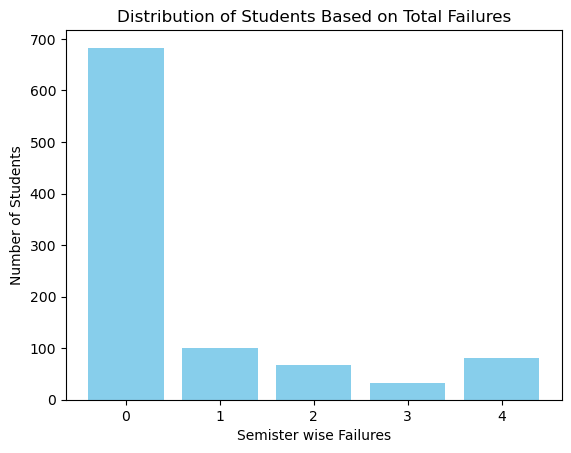

In [263]:
import matplotlib.pyplot as plt

# Count the occurrences of each total failure count
total_failures_count = df['Total Failures'].value_counts().sort_index()

# Plotting a bar plot
plt.bar(total_failures_count.index, total_failures_count.values, color='skyblue')
plt.xlabel('Semister wise Failures')
plt.ylabel('Number of Students')
plt.title('Distribution of Students Based on Total Failures')
plt.show()


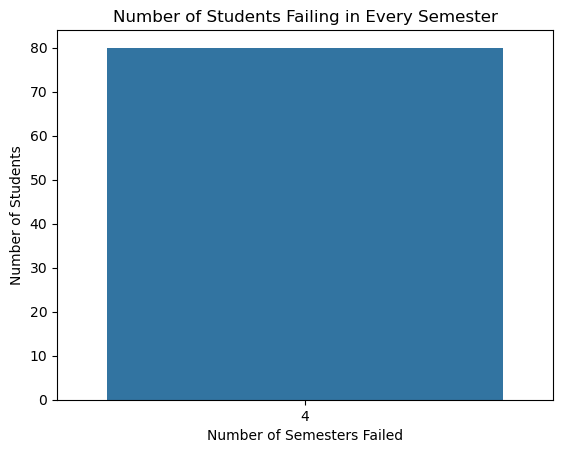

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of students failing in every semester
students_failing_counts = students_failing_every_sem['Total Failures'].value_counts()

# Create a bar chart
sns.barplot(x=students_failing_counts.index, y=students_failing_counts.values)
plt.xlabel('Number of Semesters Failed')
plt.ylabel('Number of Students')
plt.title('Number of Students Failing in Every Semester')
plt.show()


In [265]:
# Convert columns to numeric using .loc
df.loc[:, ['Backlogs1', 'Backlogs2', 'Backlogs3', 'Backlogs4']] = df.loc[:, ['Backlogs1', 'Backlogs2', 'Backlogs3', 'Backlogs4']].apply(pd.to_numeric, errors='coerce')

# Create a new feature 'Backlog_Score' based on the inverse of the number of backlogs
df['Backlog_Score'] = 1 / (df['Backlogs1'] + df['Backlogs2'] + df['Backlogs3'] + df['Backlogs4'] + 1)

# Display the updated DataFrame
print(df[['Backlogs1', 'Backlogs2', 'Backlogs3', 'Backlogs4', 'Backlog_Score']])


            Backlogs1  Backlogs2  Backlogs3  Backlogs4  Backlog_Score
RollNo.                                                              
21B81A0101          0        0.0        0.0        1.0       0.500000
21B81A0102          0        0.0        0.0        0.0       1.000000
21B81A0103          4        1.0        2.0        3.0       0.090909
21B81A0104          2        0.0        0.0        1.0       0.250000
21B81A0105          0        0.0        0.0        0.0       1.000000
...               ...        ...        ...        ...            ...
21B81A67C4          0        0.0        0.0        1.0       0.500000
21B81A67C5          0        0.0        0.0        0.0       1.000000
21B81A67C6          0        0.0        0.0        0.0       1.000000
21B81A67C7          0        0.0        0.0        1.0       0.500000
21B81A67C8          0        0.0        0.0        0.0       1.000000

[963 rows x 5 columns]


In [266]:
# Calculate the average of scores from all semesters
df['University Average'] = df[['Sem1', 'Sem2', 'Sem3', 'Sem4']].mean(axis=1)

# Display the updated DataFrame
print(df)


           Branch  tenth     inter  exam_type  Sem1  Backlogs1  Sem2  \
RollNo.                                                                
21B81A0101  CIVIL    9.5  9.294355        3.0  8.03          0  7.89   
21B81A0102  CIVIL    8.8  7.641129        2.0  8.00          0  7.84   
21B81A0103  CIVIL    8.5  6.169355        3.0  0.00          4  0.00   
21B81A0104  CIVIL    9.8  9.778226        2.0  0.00          2  7.70   
21B81A0105  CIVIL   10.0  9.677419        3.0  7.78          0  8.76   
...           ...    ...       ...        ...   ...        ...   ...   
21B81A67C4     DS   10.0  9.818548        3.0  7.88          0  8.75   
21B81A67C5     DS   10.0  9.939516        2.0  9.48          0  9.60   
21B81A67C6     DS   10.0  9.637097        3.0  7.58          0  9.43   
21B81A67C7     DS   10.0  9.919355        3.0  9.33          0  9.50   
21B81A67C8     DS    9.8  9.707661        3.0  8.70          0  9.28   

            Backlogs2  Sem3  Backlogs3  Sem4  Backlogs4  Gender

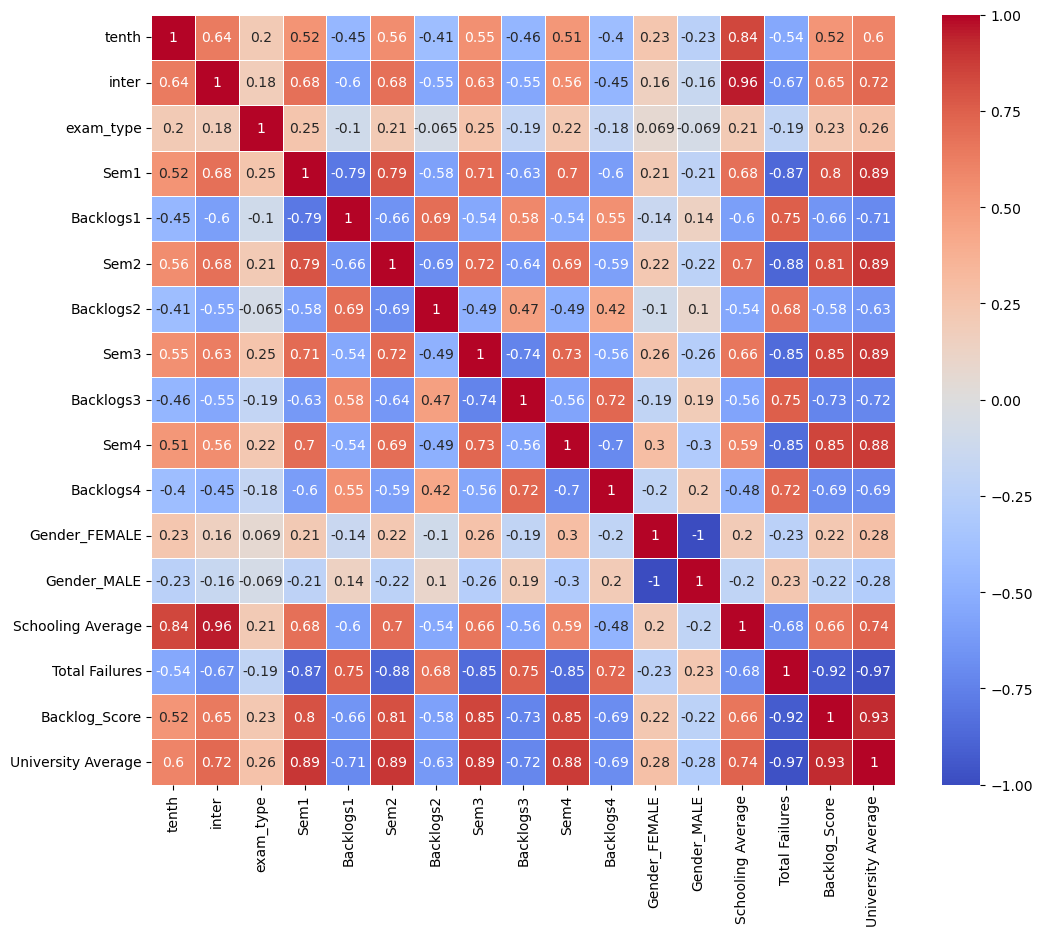

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

In [268]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                       tenth     inter  exam_type      Sem1  Backlogs1  \
tenth               1.000000  0.640121   0.204157  0.524804  -0.451619   
inter               0.640121  1.000000   0.183233  0.680306  -0.595574   
exam_type           0.204157  0.183233   1.000000  0.246124  -0.099958   
Sem1                0.524804  0.680306   0.246124  1.000000  -0.792459   
Backlogs1          -0.451619 -0.595574  -0.099958 -0.792459   1.000000   
Sem2                0.557002  0.684685   0.210830  0.789330  -0.658629   
Backlogs2          -0.405209 -0.548041  -0.064657 -0.582447   0.693700   
Sem3                0.546187  0.630363   0.253351  0.710048  -0.541268   
Backlogs3          -0.457407 -0.548680  -0.186863 -0.630808   0.584790   
Sem4                0.508336  0.558475   0.221528  0.695380  -0.536545   
Backlogs4          -0.400299 -0.454014  -0.178240 -0.602459   0.545501   
Gender_FEMALE       0.234584  0.155019   0.069471  0.211314  -0.141784   
Gender_MALE        -0.234584 -0.155019

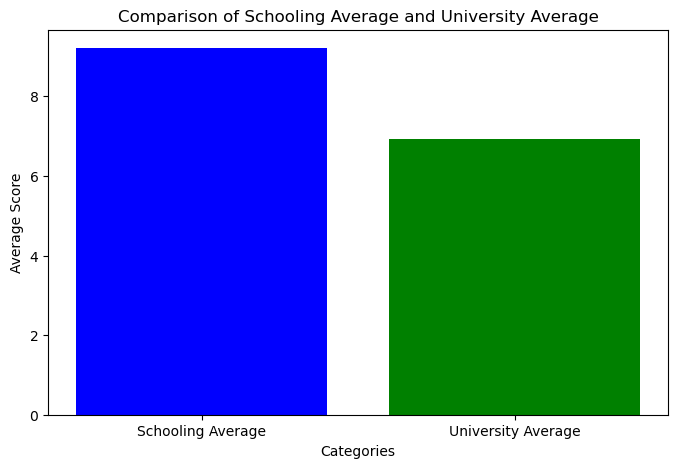

In [269]:
import matplotlib.pyplot as plt

# Data
categories = ['Schooling Average', 'University Average']
values = [df['Schooling Average'].mean(), df['University Average'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'green'])
plt.title('Comparison of Schooling Average and University Average')
plt.xlabel('Categories')
plt.ylabel('Average Score')
plt.show()


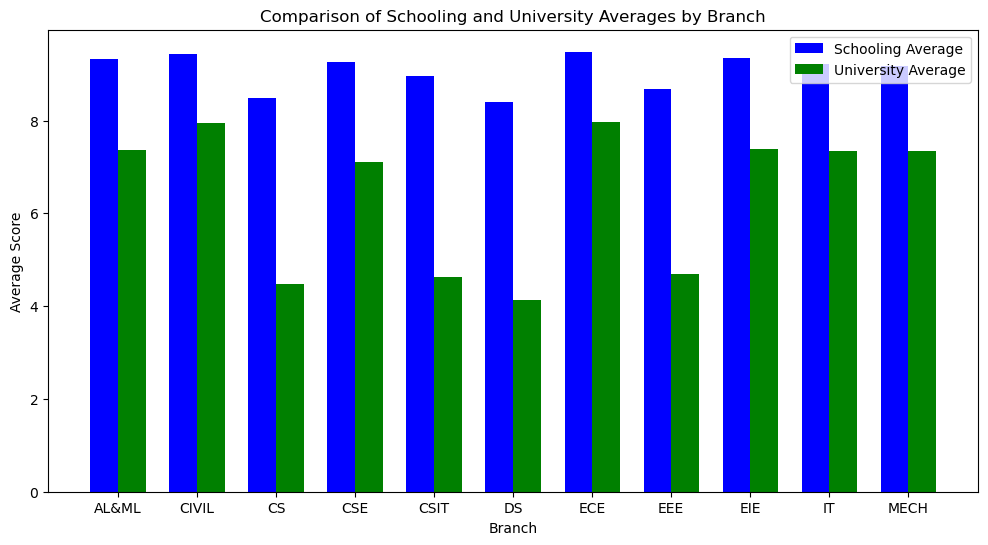

In [270]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming 'Branch' column contains categorical values
le = LabelEncoder()
df['Branch_Label'] = le.fit_transform(df['Branch'])

# Create a mapping between numerical labels and original branch names
label_mapping = dict(zip(df['Branch_Label'], df['Branch']))

# Calculate branch-wise averages for Schooling Average and University Average
branch_schooling_avg = df.groupby('Branch_Label')['Schooling Average'].mean()
branch_university_avg = df.groupby('Branch_Label')['University Average'].mean()

# Data
branches = df['Branch_Label'].unique()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
bar1 = ax.bar(branches, branch_schooling_avg, width=bar_width, label='Schooling Average', color='blue')
bar2 = ax.bar(branches + bar_width, branch_university_avg, width=bar_width, label='University Average', color='green')

# Add labels, title, and legend
ax.set_xlabel('Branch')
ax.set_ylabel('Average Score')
ax.set_title('Comparison of Schooling and University Averages by Branch')
ax.set_xticks(branches + bar_width / 2)
ax.set_xticklabels([label_mapping[label] for label in branches])  # Use original branch names
ax.legend()

plt.show()


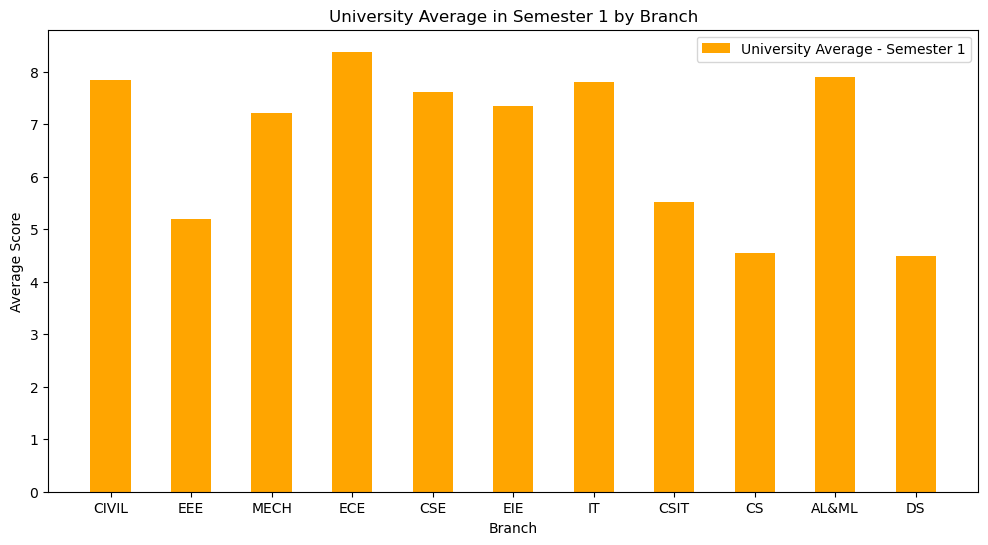

In [271]:
import matplotlib.pyplot as plt

# Calculate branch-wise averages for University Average in Semester 1
branch_sem1_avg = df.groupby('Branch')['Sem1'].mean()

# Data
branches = df['Branch'].unique()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.5
bar1 = ax.bar(branches, branch_sem1_avg, width=bar_width, label='University Average - Semester 1', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Branch')
ax.set_ylabel('Average Score')
ax.set_title('University Average in Semester 1 by Branch')
ax.set_xticks(branches)
ax.legend()

plt.show()


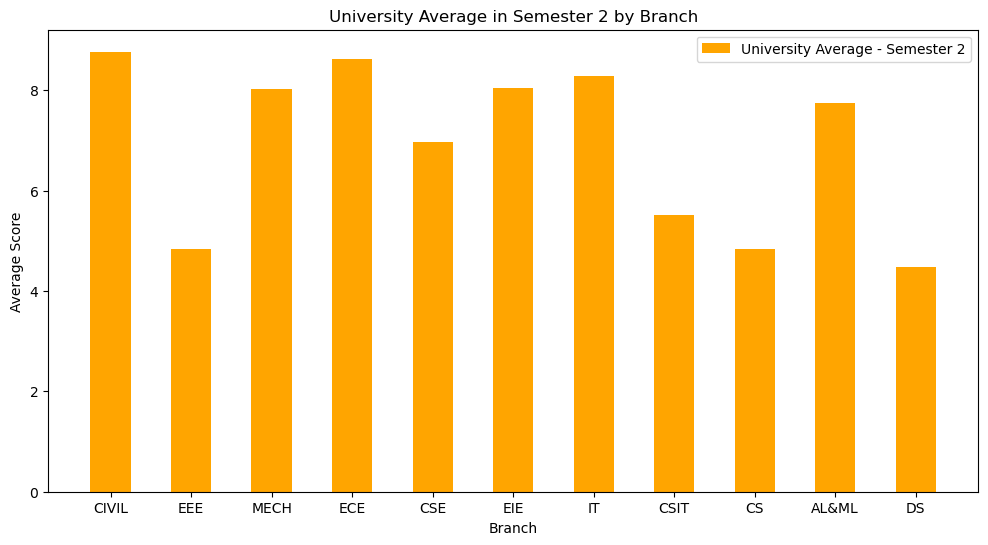

In [272]:
import matplotlib.pyplot as plt

# Calculate branch-wise averages for University Average in Semester 1
branch_sem1_avg = df.groupby('Branch')['Sem2'].mean()

# Data
branches = df['Branch'].unique()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.5
bar1 = ax.bar(branches, branch_sem1_avg, width=bar_width, label='University Average - Semester 2', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Branch')
ax.set_ylabel('Average Score')
ax.set_title('University Average in Semester 2 by Branch')
ax.set_xticks(branches)
ax.legend()

plt.show()


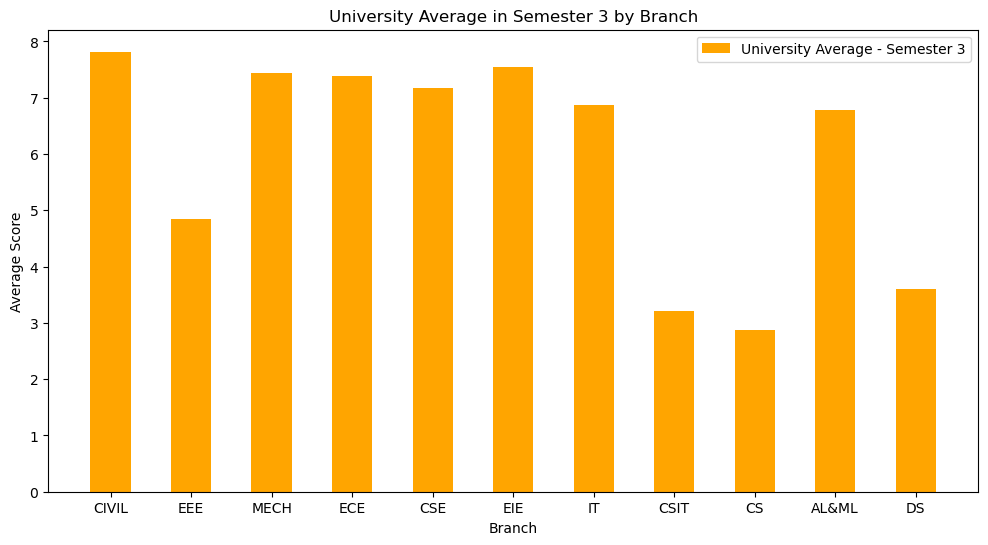

In [273]:
import matplotlib.pyplot as plt

# Calculate branch-wise averages for University Average in Semester 1
branch_sem1_avg = df.groupby('Branch')['Sem3'].mean()

# Data
branches = df['Branch'].unique()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.5
bar1 = ax.bar(branches, branch_sem1_avg, width=bar_width, label='University Average - Semester 3', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Branch')
ax.set_ylabel('Average Score')
ax.set_title('University Average in Semester 3 by Branch')
ax.set_xticks(branches)
ax.legend()

plt.show()


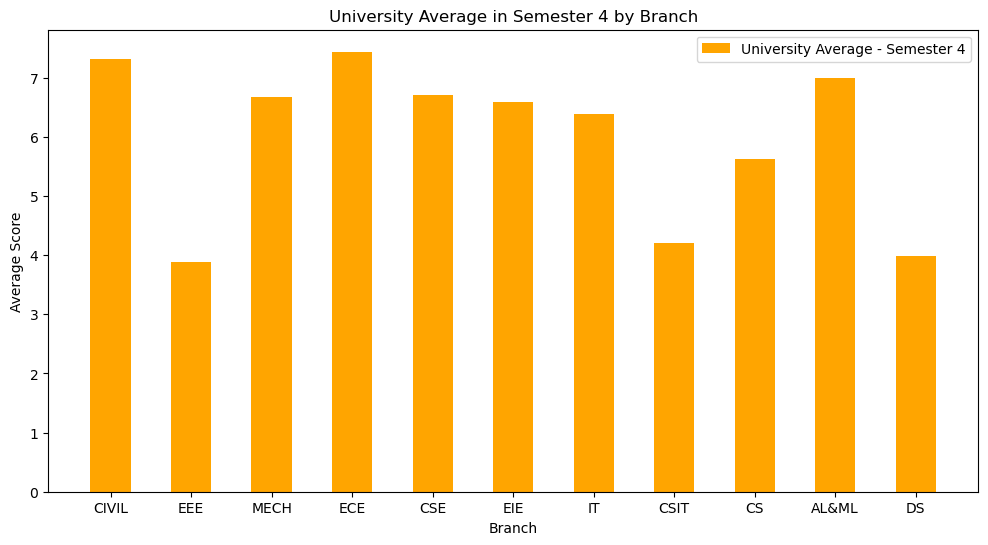

In [274]:
import matplotlib.pyplot as plt

# Calculate branch-wise averages for University Average in Semester 1
branch_sem1_avg = df.groupby('Branch')['Sem4'].mean()

# Data
branches = df['Branch'].unique()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.5
bar1 = ax.bar(branches, branch_sem1_avg, width=bar_width, label='University Average - Semester 4', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Branch')
ax.set_ylabel('Average Score')
ax.set_title('University Average in Semester 4 by Branch')
ax.set_xticks(branches)
ax.legend()

plt.show()


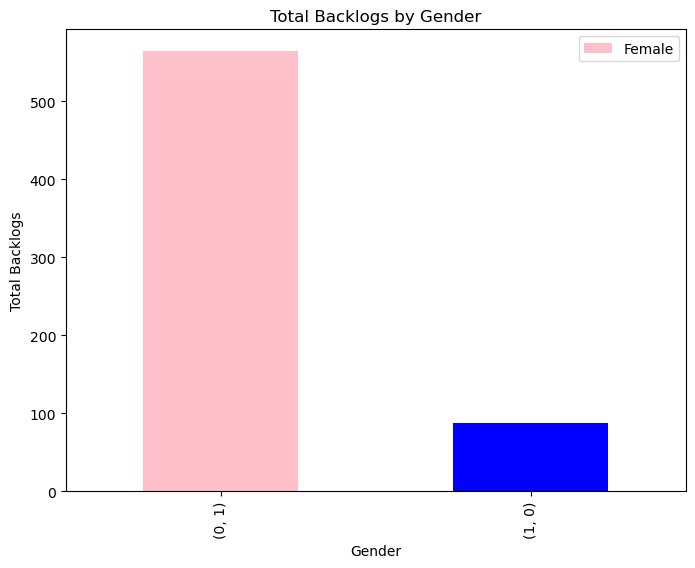

In [278]:
import matplotlib.pyplot as plt

# Calculate total backlogs by gender
gender_backlogs = df.groupby(['Gender_FEMALE', 'Gender_MALE'])['Total Failures'].sum()

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
gender_backlogs.plot(kind='bar', ax=ax, color=['pink', 'blue'])

# Add labels, title, and legend
ax.set_xlabel('Gender')
ax.set_ylabel('Total Backlogs')
ax.set_title('Total Backlogs by Gender')
ax.legend(['Female', 'Male'])

plt.show()


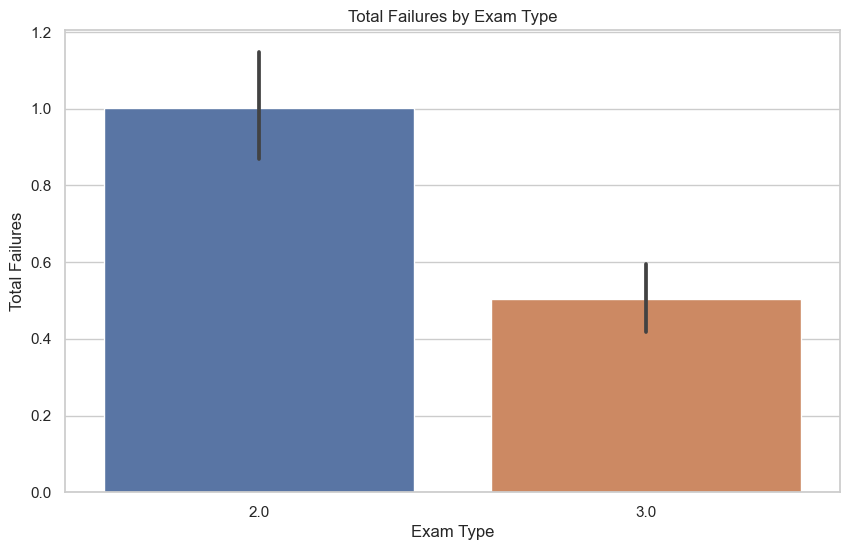

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='exam_type', y='Total Failures', data=df)

# Add labels, title, and legend
plt.xlabel('Exam Type')
plt.ylabel('Total Failures')
plt.title('Total Failures by Exam Type')
plt.show()


In [286]:
exam_type_2_3_entries = df[df['exam_type'].isin([2.0, 3.0])]
print(exam_type_2_3_entries)

           Branch  tenth     inter  exam_type  Sem1  Backlogs1  Sem2  \
RollNo.                                                                
21B81A0101  CIVIL    9.5  9.294355        3.0  8.03          0  7.89   
21B81A0102  CIVIL    8.8  7.641129        2.0  8.00          0  7.84   
21B81A0103  CIVIL    8.5  6.169355        3.0  0.00          4  0.00   
21B81A0104  CIVIL    9.8  9.778226        2.0  0.00          2  7.70   
21B81A0105  CIVIL   10.0  9.677419        3.0  7.78          0  8.76   
...           ...    ...       ...        ...   ...        ...   ...   
21B81A67C4     DS   10.0  9.818548        3.0  7.88          0  8.75   
21B81A67C5     DS   10.0  9.939516        2.0  9.48          0  9.60   
21B81A67C6     DS   10.0  9.637097        3.0  7.58          0  9.43   
21B81A67C7     DS   10.0  9.919355        3.0  9.33          0  9.50   
21B81A67C8     DS    9.8  9.707661        3.0  8.70          0  9.28   

            Backlogs2  Sem3  Backlogs3  Sem4  Backlogs4  Gender

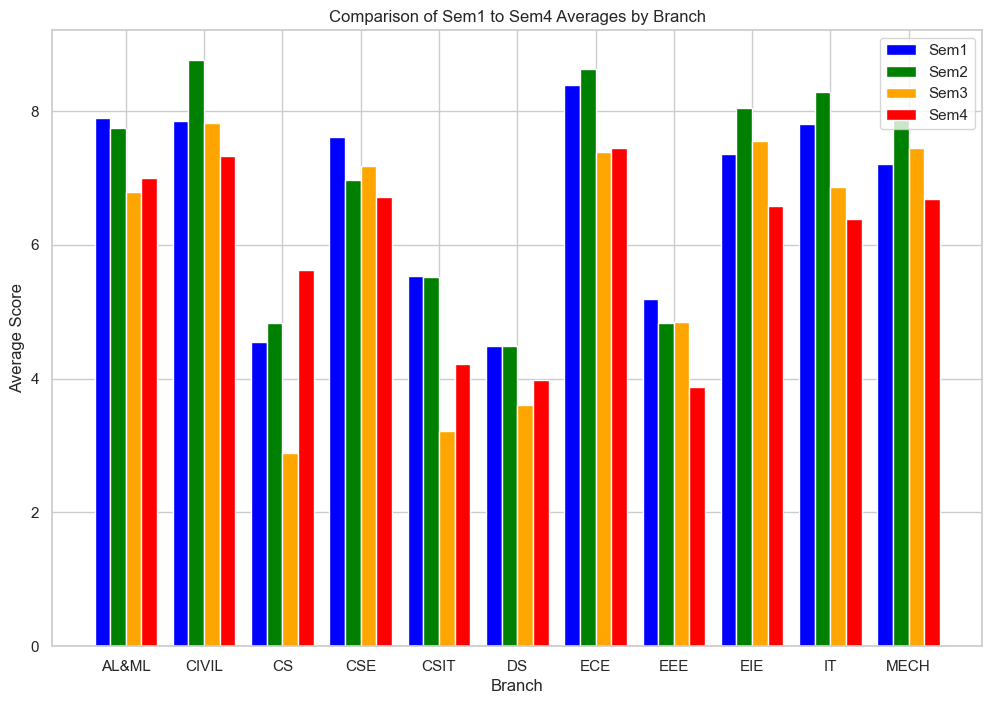

In [288]:
import matplotlib.pyplot as plt

# Convert 'Branch' to a numerical type
df['Branch_Label'] = pd.Categorical(df['Branch'])
df['Branch_Code'] = df['Branch_Label'].cat.codes

# Calculate branch-wise averages for Sem1, Sem2, Sem3, and Sem4
branch_sem1_avg = df.groupby('Branch_Code')['Sem1'].mean()
branch_sem2_avg = df.groupby('Branch_Code')['Sem2'].mean()
branch_sem3_avg = df.groupby('Branch_Code')['Sem3'].mean()
branch_sem4_avg = df.groupby('Branch_Code')['Sem4'].mean()

# Data
branches = df['Branch_Code'].unique()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
bar1 = ax.bar(branches - 1.5 * bar_width, branch_sem1_avg, width=bar_width, label='Sem1', color='blue')
bar2 = ax.bar(branches - 0.5 * bar_width, branch_sem2_avg, width=bar_width, label='Sem2', color='green')
bar3 = ax.bar(branches + 0.5 * bar_width, branch_sem3_avg, width=bar_width, label='Sem3', color='orange')
bar4 = ax.bar(branches + 1.5 * bar_width, branch_sem4_avg, width=bar_width, label='Sem4', color='red')

# Add labels, title, and legend
ax.set_xlabel('Branch')
ax.set_ylabel('Average Score')
ax.set_title('Comparison of Sem1 to Sem4 Averages by Branch')
ax.set_xticks(branches)
ax.set_xticklabels(df['Branch'].unique())
ax.legend()

plt.show()


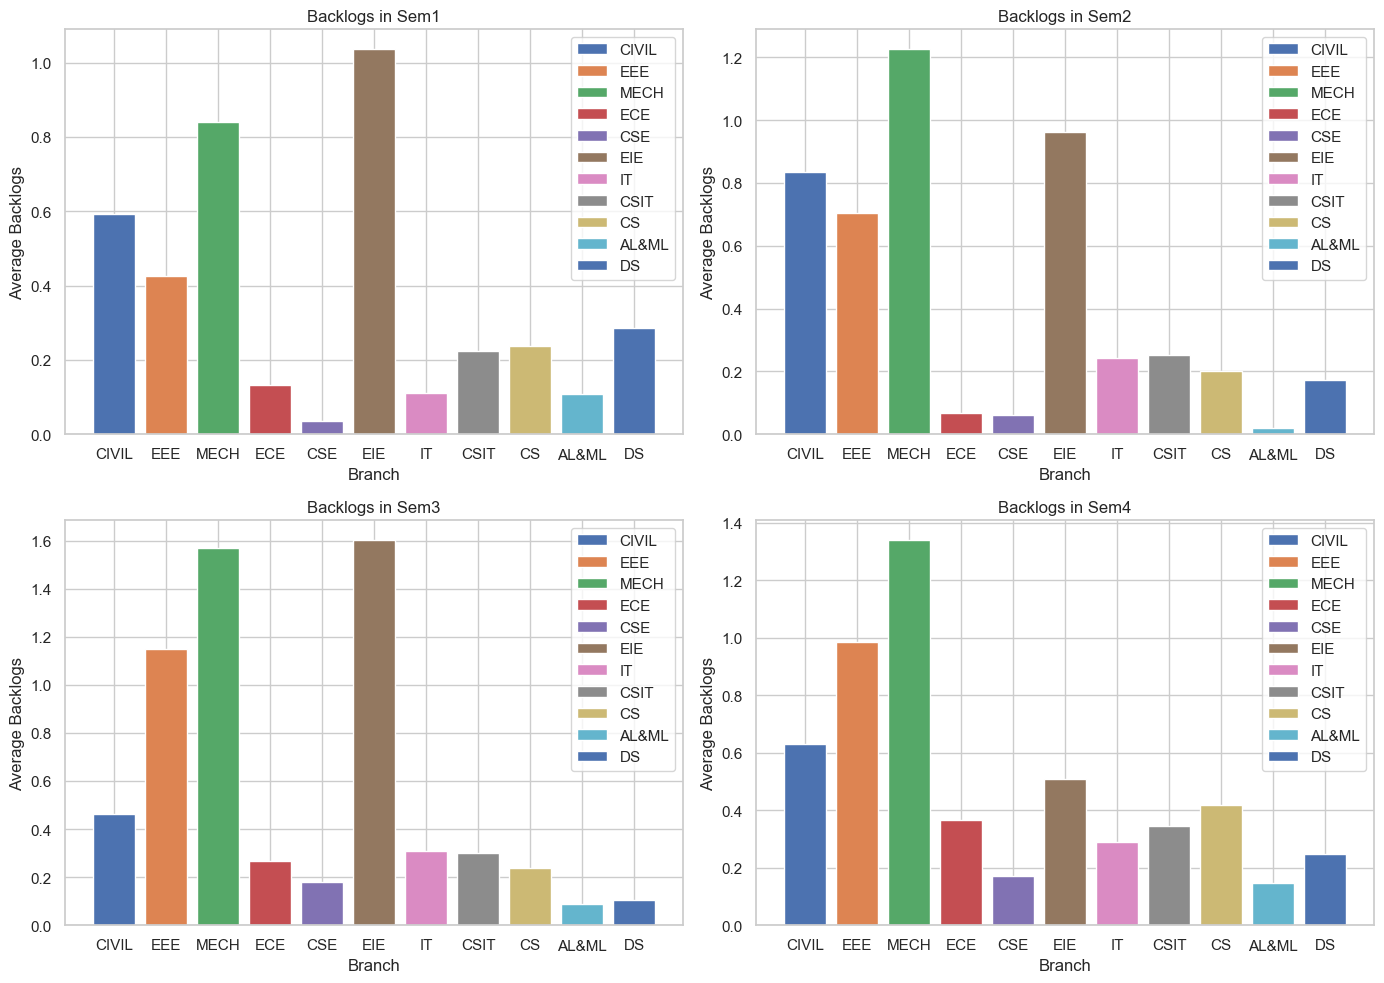

In [290]:
import matplotlib.pyplot as plt

# Data
semesters = ['Sem1', 'Sem2', 'Sem3', 'Sem4']
branches = df['Branch'].unique()
backlogs_columns = ['Backlogs1', 'Backlogs2', 'Backlogs3', 'Backlogs4']

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, semester in enumerate(semesters):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    for branch in branches:
        branch_data = df[df['Branch'] == branch]
        backlogs = branch_data[backlogs_columns[i]]
        ax.bar(branch, backlogs.mean(), label=branch)

    ax.set_title(f'Backlogs in {semester}')
    ax.set_xlabel('Branch')
    ax.set_ylabel('Average Backlogs')
    ax.legend()

plt.tight_layout()
plt.show()


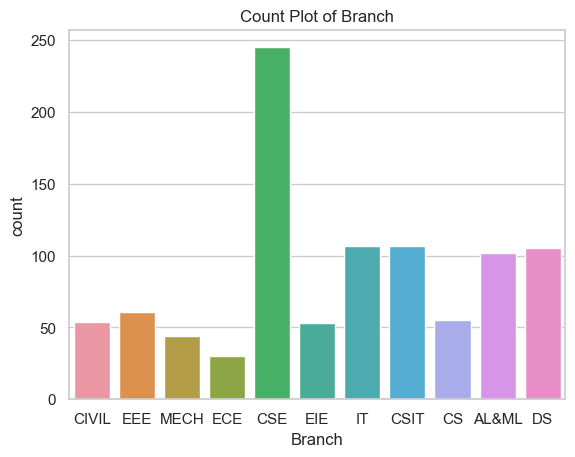

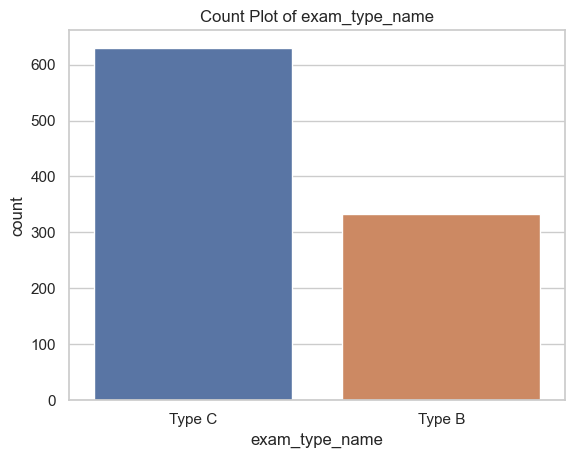

In [293]:
for column in df.select_dtypes(include=['object']).columns:
    sns.countplot(x=df[column])
    plt.title(f'Count Plot of {column}')
    plt.show()


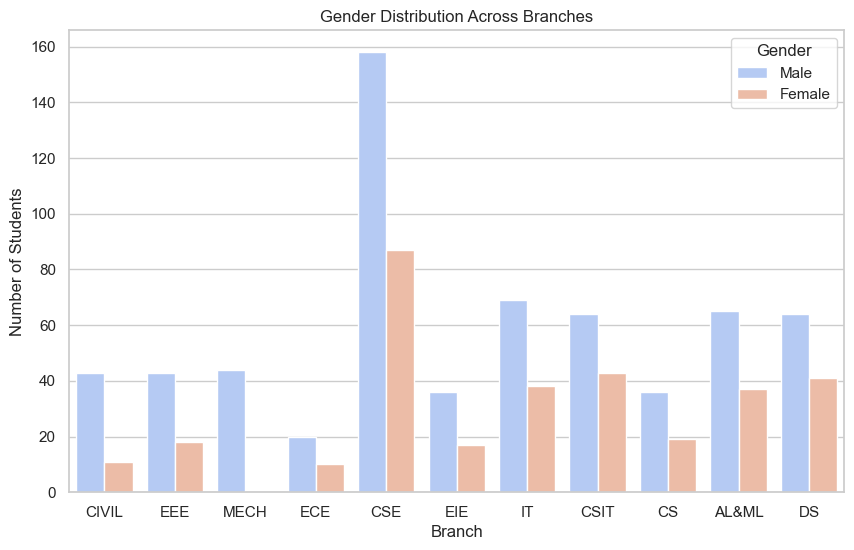

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, but can enhance the appearance of the plot

# Assuming you have a DataFrame 'df' with columns 'Branch', 'Gender_FEMALE', and 'Gender_MALE'

# Set up the figure and axes
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Branch', hue='Gender_FEMALE', data=df, palette='coolwarm')

# Customize the plot
ax.set_title('Gender Distribution Across Branches')
ax.set_xlabel('Branch')
ax.set_ylabel('Number of Students')
ax.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])

# Show the plot
plt.show()


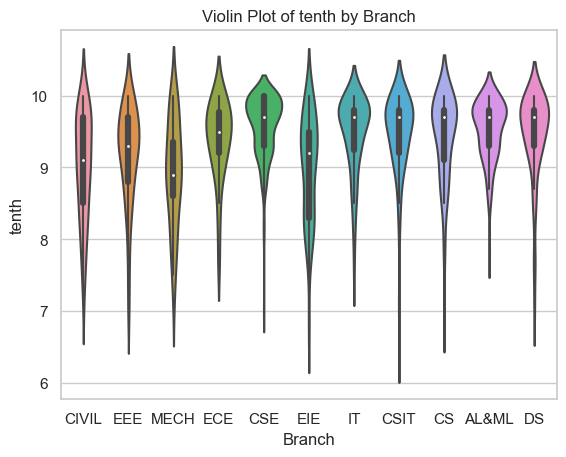

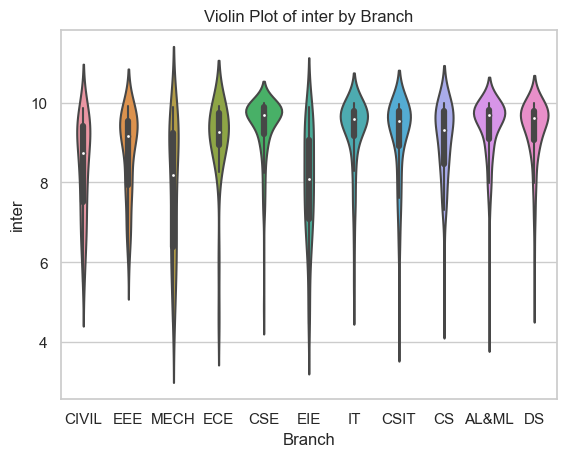

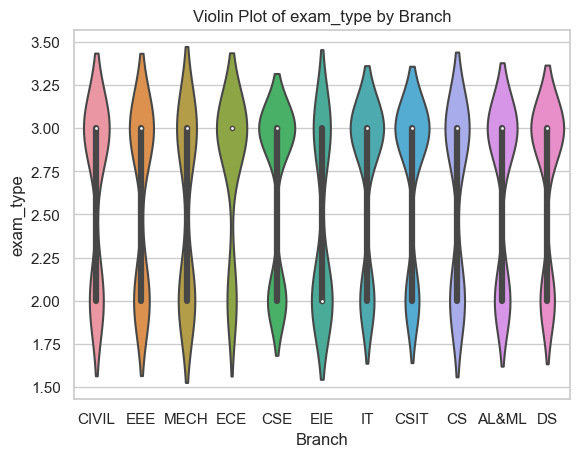

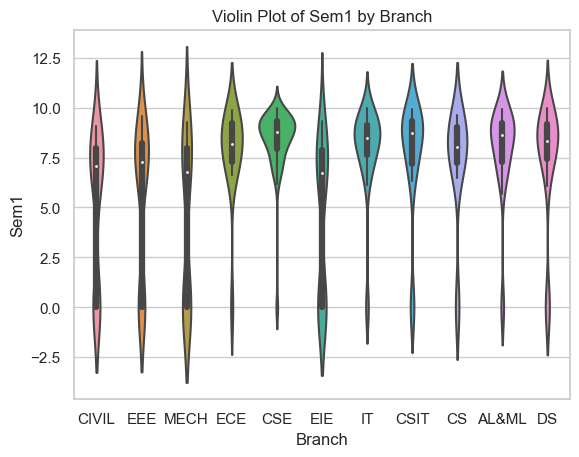

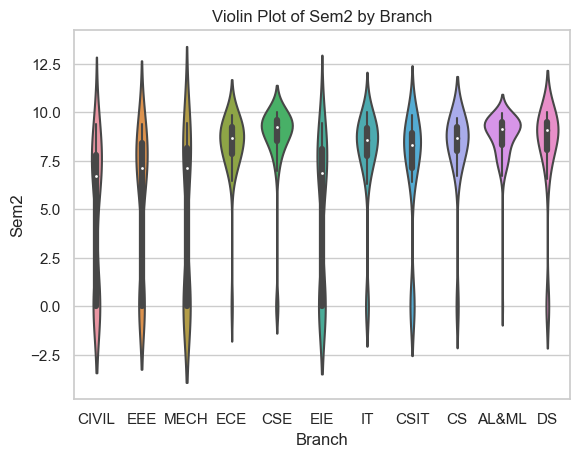

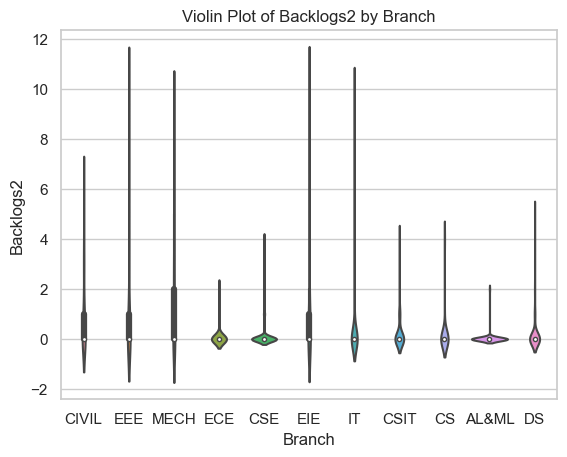

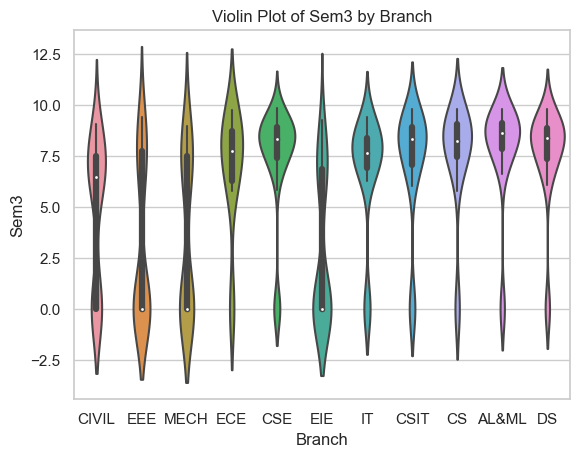

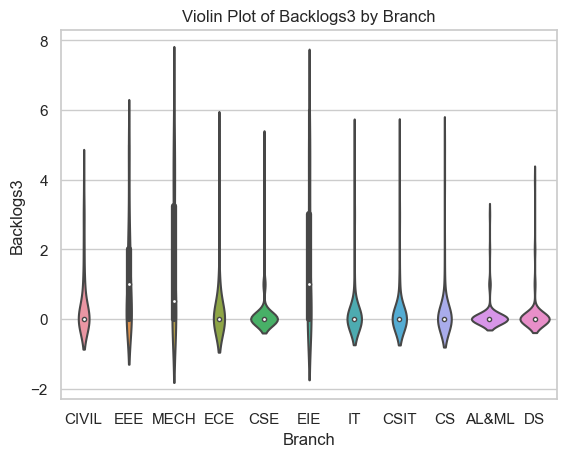

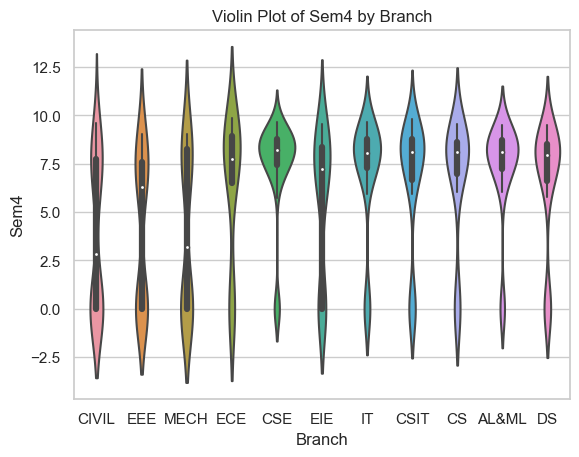

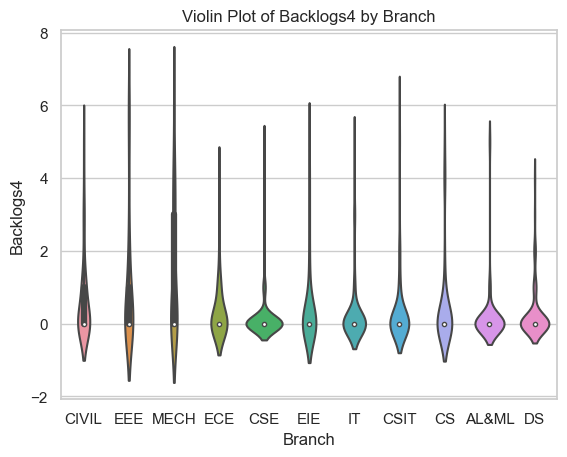

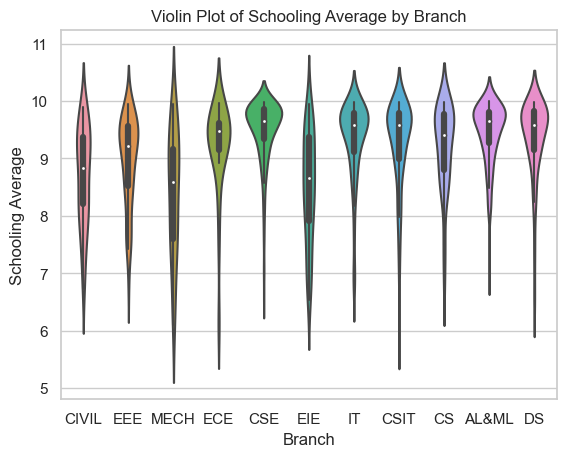

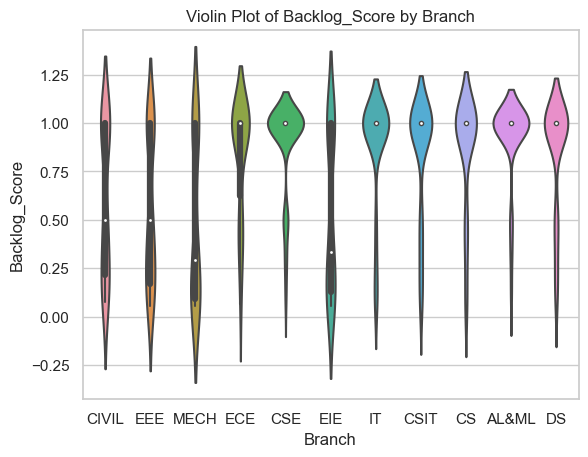

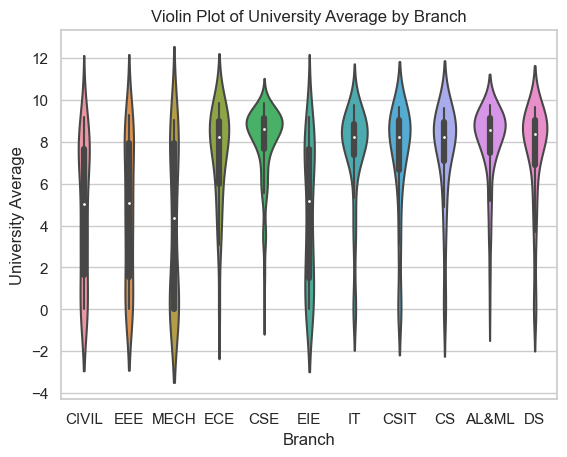

In [295]:
for column in df.select_dtypes(include=['float64']).columns:
    sns.violinplot(x='Branch', y=column, data=df)
    plt.title(f'Violin Plot of {column} by Branch')
    plt.show()
